In [17]:
import pyodbc

# Kết nối tới master để tạo DB mới
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=AUSTINNGUYEN;'  # ae thay đổi tên máy chủ
    'DATABASE=master;'
    'Trusted_Connection=yes;',
    autocommit=True  # ⚠️ Quan trọng để tránh lỗi CREATE DATABASE
)

cursor = conn.cursor()
cursor.execute("IF DB_ID('StudentDB') IS NULL CREATE DATABASE StudentDB")
print("Database 'StudentDB' đã được tạo (nếu chưa tồn tại).")
cursor.close()
conn.close()


Database 'StudentDB' đã được tạo (nếu chưa tồn tại).


In [8]:
from sqlalchemy import create_engine
import urllib

params = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=AUSTINNGUYEN;"
    "DATABASE=StudentDB;"
    "Trusted_Connection=yes;"
)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")


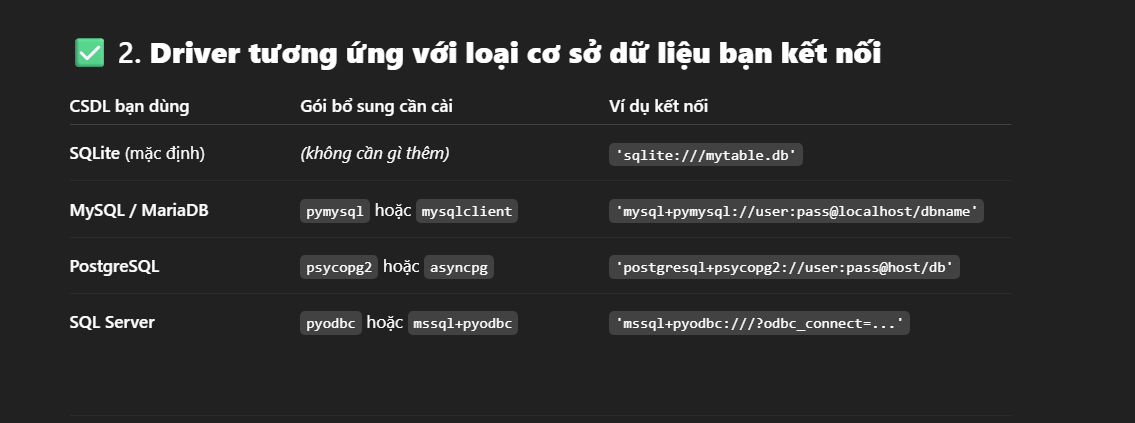

In [16]:
df_check = pd.read_sql("SELECT * FROM students_performance", engine)
print("Dữ liệu trong bảng:")
print(df_check)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3960\1100065045.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_check = pd.read_sql("SELECT * FROM students_performance", engine)


AttributeError: 'Engine' object has no attribute 'cursor'

In [ ]:
#!pip install ipython-sql sqlalchemy pyodbc


In [12]:
%load_ext sql
%sql mssql+pyodbc:///?odbc_connect={params}


'Connected: @'

In [13]:
%%sql

SELECT * FROM students_performance


 * mssql+pyodbc:///?odbc_connect=DRIVER%3D%7BODBC+Driver+17+for+SQL+Server%7D%3BSERVER%3DAUSTINNGUYEN%3BDATABASE%3DStudentDB%3BTrusted_Connection%3Dyes%3B
Done.


id,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78
7,female,group B,some college,standard,completed,88,95,92
8,male,group B,some college,free/reduced,none,40,43,39
9,male,group D,high school,free/reduced,completed,64,64,67
10,female,group B,high school,free/reduced,none,38,60,50
